# Proyecto final: La desigualdad socioeconómica y su impacto en el acceso a la educación superior

# Introducción ------------------------------------------------------------------------

# Contexto y motivación -------------------------------------------------------------

Hoy en día, la educación en Chile se caracteriza por una profunda desigualdad, que afecta 
tanto el acceso como la calidad del proceso educativo entre los diferentes grupos 
socioeconómicos. Esta situación impide que la educación sea un derecho efectivo para todos 
los estudiantes, limitando las oportunidades de muchos. 
La desigualdad educativa en el país proviene de una variedad de factores, como la calidad de 
la infraestructura, la disponibilidad de recursos educativos para los estudiantes, las 
condiciones socioeconómicas, la distribución de los docentes, el financiamiento público,  la 
ubicación de los establecimientos, entre otros. Al comparar instituciones públicas y privadas, 
estas diferencias se vuelven aún más notables. A pesar de que ambas están bajo la supervisión 
del Ministerio de Educación, las medidas que este organismo implementa no logran abordar 
adecuadamente las desigualdades existentes. Como consecuencia, las diferencias se 
mantienen y afectan de manera desproporcionada a los sectores más vulnerables de la 
población. 
En un contexto donde la educación es clave para el desarrollo social, la escasez de recursos y 
la desigualdad en las oportunidades educativas se convierten en barreras significativas. Las 
instituciones que reciben menos financiamiento enfrentan dificultades para proporcionar un 
entorno de aprendizaje adecuado, lo que limita la preparación de sus estudiantes. Esta 
situación crea un obstáculo considerable, ya que no todos los jóvenes tienen la misma 
capacidad para rendir la prueba de acceso a la educación superior de manera efectiva. Aunque 
todos los colegios del país (públicos, subvencionados y privados) utilizan diversas estrategias 
de preparación, las diferencias en recursos y apoyo educativo impactan directamente en las 
oportunidades de ingresar a una universidad.  
“Cada año el 10% de los estudiantes abandona el sistema educativo, y de estos, el 80% lo hace 
debido a la pobreza. Además, el 68% de los egresados de la educación municipal logra acceder 
a la educación superior, en contraste con el 80% de los estudiantes de colegios 
subvencionados y el 95% de los de colegios privados” (Puroperiodismo, 2022). 

Estas cifras evidencian la desigualdad que enfrenta el sistema educativo chileno, donde los 
estudiantes provenientes de familias con menos recursos tienen menos posibilidades de 
acceder a una educación superior de calidad. 
Es por esta razón que nos motiva visibilizar este gran problema. Queremos destacar cómo las 
desigualdades socioeconómicas influyen en la desigualdad educativa, afectando el acceso a 
la educación superior y las diferentes oportunidades que tienen los estudiantes. Por ello, 
nuestro público objetivo incluye al gobierno, al Ministerio de Educación, a los establecimientos 
educativos y a otras entidades relevantes. Con el fin de generar conciencia sobre este tema, 
buscando impulsar cambios que permitan a todos los jóvenes acceder a una educación en 
condiciones más justas y equitativas.

# Preguntas objetivo

### De las preguntas planteadas en un inicio conservamos:


#### • ¿Cuál es el tipo de colegio con la mayor tasa de abandono en el proceso de postulación universitaria
#### • ¿Qué tipo de institución educativa (privada, subvencionada o pública) presenta la mayor tasa de acceso a la educación superior entre sus egresados?
#### • ¿Cuáles son los resultados promedio en la prueba de acceso a la educación superior según el tipo de colegio en cada comuna
#### • ¿En qué comunas se concentran los diferentes tipos de colegios y cómo se relaciona esto con los resultados de egreso de los estudiantes??

### Mientras que las preguntas que surgieron a lo largo del camino fueron:

#### • Puntaje Maximo por comuna
#### • Variacion de puntaje por comuna
#### • Ingreso per capita por comuna
#### • Cantidad de personas que rindieron minimo una prueba por comuna 
#### • Analisis comparativo de desempeño por comuna

# Datos --------------------------------------------------------------------------------

Los datos conseguidos ademas de por categoria (admision, matricula, postulaciones y rendicion) se encontraban repartidos por año de emision, por lo que decidimos realizar una breve limpieza de los datos asi como unificarlos para tener todos los años en un mismo archivo. proceso realizado en los documentos descritos en la carpeta del repositorio llamada *Limpieza_De_Datos*, estos archivos estan hechos para generar los archivos que se usan en este notebook

# Librerias -----------------------------------------------------------------------------

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Dataframe: Inscripciones

In [189]:
inscripcion = pd.read_csv("Dataframe_inscripciones.csv", low_memory=False)

In [190]:
inscripcion

,ID_aux,AÑO,SEXO,GRUPO_DEPENDENCIA,FECHA_NACIMIENTO,ANYO_EGRESO,CODIGO_REGION,COMUNA,INGRESO_PERCAPITA_GRUPO_FA
0,2396923379687,2023,2,4,121987,2005.0,13,SAN MIGUEL,99
1,9175591277550,2023,2,4,122003,2021.0,13,SANTIAGO,8
2,747907974734,2023,2,4,51993,2010.0,13,LA CISTERNA,99
3,833908173395,2023,1,4,121991,2016.0,13,PEÑALOLEN,2
4,6962969176287,2023,1,4,11996,2014.0,13,SANTIAGO,5
...,...,...,...,...,...,...,...,...,...
574500,9994599479410,2019,1,2,52001,2018.0,13,PUDAHUEL,3
574501,9994999779485,2019,2,2,101967,2018.0,13,MAIPU,0
574502,9995999979507,2019,2,3,31967,2018.0,13,SAN BERNARDO,0
574503,9997599679743,2019,2,2,12001,2018.0,13,QUINTA NORMAL,1


## 2. Dataframe: Rendición

In [122]:
rendicion = pd.read_csv("Dataframe_rendiciones.csv", low_memory=False)

In [123]:
rendicion

,AÑO,ID_aux,GRUPO_DEPENDENCIA,CODIGO_REGION,COMUNA,PROMEDIO_NOTAS,PTJE_NEM,PTJE_RANKING,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,MATE2_REG_ACTUAL,HCSOC_REG_ACTUAL,CIEN_REG_ACTUAL,MATE_ACTUAL
0,2023,900170003,3,13,SAN BERNARDO,5.03,429,429,0.0,402.0,351.0,423.0,0.0,NaN
1,2023,900470024,3,13,HUECHURABA,5.90,689,766,475.0,0.0,0.0,0.0,0.0,NaN
2,2023,1900170136,2,13,LA FLORIDA,6.30,799,880,761.0,790.0,545.0,0.0,728.0,NaN
3,2023,1900470154,2,13,RECOLETA,4.90,387,405,0.0,0.0,0.0,0.0,0.0,NaN
4,2023,1900770142,3,13,ESTACION CENTRAL,5.05,436,436,490.0,0.0,413.0,423.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531593,2019,9990999779067,2,13,PADRE HURTADO,6.15,654,830,372.0,NaN,NaN,0.0,329.0,329.0
531594,2019,9994599479410,2,13,PUDAHUEL,4.98,406,406,580.0,NaN,NaN,0.0,463.0,482.0
531595,2019,9995999979507,3,13,SAN BERNARDO,6.00,623,801,321.0,NaN,NaN,0.0,402.0,329.0
531596,2019,9997599679743,2,13,PROVIDENCIA,6.00,622,693,517.0,NaN,NaN,354.0,0.0,567.0


## 3. Dataframe: Postulaciones

In [125]:
postulaciones = pd.read_csv("Dataframe_postulaciones.csv", low_memory=False)

In [126]:
postulaciones

,ID_aux,SITUACION_POSTULANTE,PTJE_PREF_01,SITUACION_POSTULANTE_BEA,PTJE_PREF_01_BEA,SITUACION_POSTULANTE_PACE,PTJE_PREF_01_PACE,AÑO
0,1900070103,P,543.90,NaN,NaN,NaN,NaN,2023
1,1900170136,P,794.95,NaN,NaN,NaN,NaN,2023
2,1900670175,P,570.10,NaN,NaN,NaN,NaN,2023
3,1900870116,P,719.90,NaN,NaN,NaN,NaN,2023
4,2900370264,P,522.90,NaN,NaN,NaN,NaN,2023
...,...,...,...,...,...,...,...,...
773147,9977599877703,P,622.80,NaN,NaN,NaN,NaN,2019
773148,9979599877997,P,599.20,NaN,NaN,P,817.014,2019
773149,9985599478544,P,504.80,NaN,NaN,NaN,NaN,2019
773150,9987599278786,P,545.30,NaN,NaN,NaN,NaN,2019


## 4. Dataframe: Matrículas

In [134]:
matriculas = pd.read_csv("Dataframe_matriculas.csv", low_memory=False)

In [135]:
matriculas

,ID_aux,VIA,PTJE_POND,AÑO
0,267832678788,1,513.60,2023
1,16130170616,1,565.85,2023
2,514305173430,1,724.70,2023
3,42500470254,1,697.60,2023
4,699806974987,1,722.00,2023
...,...,...,...,...
501283,419145141624,1,727.00,2019
501284,265928647737,1,607.80,2019
501285,444844448720,1,588.30,2019
501286,816481140157,1,596.80,2019


# Análisis exploratorio de datos -----------------------------------------------------

In [29]:
matriculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501288 entries, 0 to 501287
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID_aux     501288 non-null  int64  
 1   VIA        501288 non-null  int64  
 2   PTJE_POND  501288 non-null  float64
 3   AÑO        501288 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 15.3 MB


In [31]:
rendicion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531598 entries, 0 to 531597
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AÑO                531598 non-null  int64  
 1   ID_aux             531598 non-null  int64  
 2   GRUPO_DEPENDENCIA  531598 non-null  int64  
 3   CODIGO_REGION      531598 non-null  int64  
 4   COMUNA             527208 non-null  object 
 5   PROMEDIO_NOTAS     531598 non-null  float64
 6   PTJE_NEM           531598 non-null  int64  
 7   PTJE_RANKING       531598 non-null  int64  
 8   CLEC_REG_ACTUAL    523509 non-null  float64
 9   MATE1_REG_ACTUAL   105474 non-null  float64
 10  MATE2_REG_ACTUAL   105474 non-null  float64
 11  HCSOC_REG_ACTUAL   523509 non-null  float64
 12  CIEN_REG_ACTUAL    523509 non-null  float64
 13  MATE_ACTUAL        418035 non-null  float64
dtypes: float64(7), int64(6), object(1)
memory usage: 56.8+ MB


In [37]:
# crear copias de los dataframes para no alterar los originales
copy_matriculas = matriculas.copy()
copy_rendicion = rendicion.copy()

In [41]:
# ahora se juntan los datos de rendicion y de matricula a partir de la columna ID_aux
proceso = pd.merge(copy_matriculas, copy_rendicion, on="ID_aux")
proceso

,ID_aux,VIA,PTJE_POND,AÑO_x,AÑO_y,GRUPO_DEPENDENCIA,CODIGO_REGION,COMUNA,PROMEDIO_NOTAS,PTJE_NEM,PTJE_RANKING,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,MATE2_REG_ACTUAL,HCSOC_REG_ACTUAL,CIEN_REG_ACTUAL,MATE_ACTUAL
0,16130170616,1,565.85,2023,2023,2,13,RECOLETA,5.50,577,577,606.0,452.0,0.0,489.0,0.0,NaN
1,699806974987,1,722.00,2023,2023,3,13,MAIPU,5.68,623,657,729.0,601.0,0.0,874.0,0.0,NaN
2,8577985477741,1,730.20,2023,2023,2,13,SANTIAGO,6.15,757,770,701.0,595.0,0.0,767.0,0.0,NaN
3,8759987675960,1,463.65,2023,2023,3,13,PROVIDENCIA,4.90,384,384,596.0,491.0,0.0,702.0,0.0,NaN
4,8145981274524,1,545.50,2023,2023,4,13,CERRO NAVIA,5.18,473,537,0.0,499.0,428.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281891,2495524979573,1,525.90,2019,2019,3,13,BUIN,6.65,757,805,445.0,NaN,NaN,512.0,488.0,465.0
281892,6882168578250,1,791.81,2019,2019,1,13,PEÑALOLEN,6.98,825,850,766.0,NaN,NaN,696.0,0.0,775.0
281893,401445043,1,515.30,2019,2019,1,13,LAS CONDES,5.00,415,420,547.0,NaN,NaN,0.0,537.0,535.0
281894,1239142260,1,593.55,2019,2019,1,13,LAS CONDES,5.68,554,554,563.0,NaN,NaN,0.0,687.0,631.0


In [43]:
print(f"El largo del dataframe de rendicion es: {len(copy_rendicion)}")
print(f"la cantidad de gente que rindio la prueba y se matriculo es de: {len(proceso)}")
print(f"Significando que se matriculo un aproximado del {len(proceso)*100//len(copy_rendicion)}% de las personas que rindieron la prueba")

El largo del dataframe de rendicion es: 531598
la cantidad de gente que rindio la prueba y se matriculo es de: 281896
Significando que se matriculo un aproximado del 53% de las personas que rindieron la prueba


In [47]:
# ahora se eliminan las filas cuya columna GRUPO_DEPENDENCIA es NaN ya que es lo que nos permite saber el tipo de establecimiento del alumno
proceso.dropna(subset = ["GRUPO_DEPENDENCIA"], inplace=True)
print(f"Nos quedan {len(proceso)} datos")
print(f"Se elimino un {100-(len(proceso)*100//531598)}% de los datos")

Nos quedan 281896 datos
Se elimino un 47% de los datos


In [53]:
# valores disponibles
proceso["GRUPO_DEPENDENCIA"].value_counts()

GRUPO_DEPENDENCIA
2    144053
1     79103
3     55665
0      1884
4      1191
Name: count, dtype: int64

In [55]:
# los datos de la columna GRUPO_DEPENDENCIA se encuentran como categorias, explicadas en el documento asociado a cada conjunto de datos
# 0 = NaN (cambio hecho durante la limpieza)
# 1 = Particular pagado (privado)
# 2 = Particular subvencionado (subvencionado)
# 3 = Municipal (publico)
# estos son los que se usaran en el analisis, por lo que el 4 no se contara
proceso = proceso[proceso["GRUPO_DEPENDENCIA"]!=4]
proceso = proceso[proceso["GRUPO_DEPENDENCIA"]!=0]
proceso["GRUPO_DEPENDENCIA"].value_counts()

GRUPO_DEPENDENCIA
2    144053
1     79103
3     55665
Name: count, dtype: int64

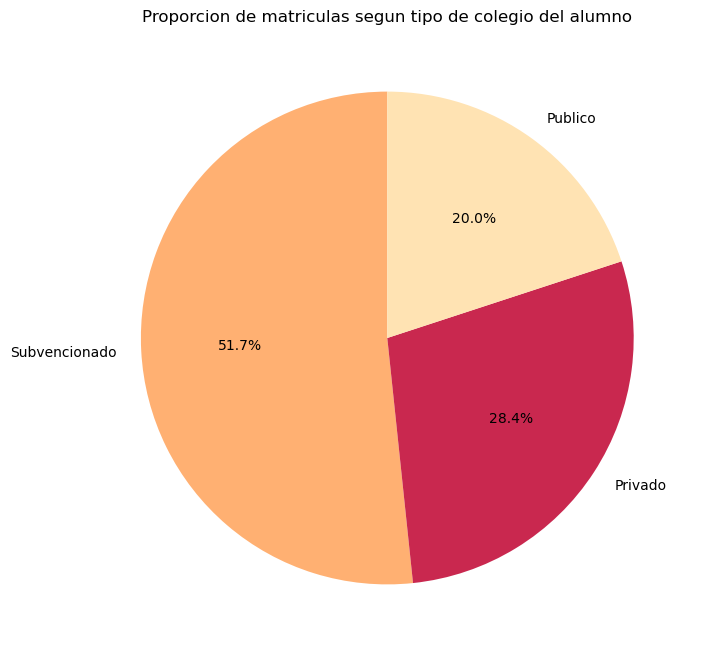

In [178]:
cantidades = proceso["GRUPO_DEPENDENCIA"].value_counts()
nombres = ["Subvencionado", "Privado", "Publico"]
colores = ["#FFB072", "#C9284F", "#FFE3B3"]
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=nombres,colors=colores, autopct="%1.1f%%", startangle=90)
plt.title("Proporcion de matriculas segun tipo de colegio del alumno")
plt.show()

In [405]:
# esto nos entrega los procentajes de las personas que se matricularon pero aun falta saber la proporcion de los alumnos que rinden la prueba segun cada
# institucion para tener una idea mejor de lo que significan estos datos
# ahora vamos a repetir parte del proceso anterior pero en el dataframe de rendiciones, y comparar las cantidades de cada institucion

In [67]:
copy_rendicion = rendicion.copy()
# eliminacion de NaN
copy_rendicion.dropna(subset = ["GRUPO_DEPENDENCIA"], inplace=True)
# pasar a int
#copy_rendicion["GRUPO_DEPENDENCIA"] = copy_rendicion["GRUPO_DEPENDENCIA"].astype("int")
# eliminar los datos de categoria 4
copy_rendicion = copy_rendicion[copy_rendicion["GRUPO_DEPENDENCIA"]!=4]
copy_rendicion = copy_rendicion[copy_rendicion["GRUPO_DEPENDENCIA"]!=0]
copy_rendicion["GRUPO_DEPENDENCIA"].value_counts()

GRUPO_DEPENDENCIA
2    294601
3    134603
1     92760
Name: count, dtype: int64

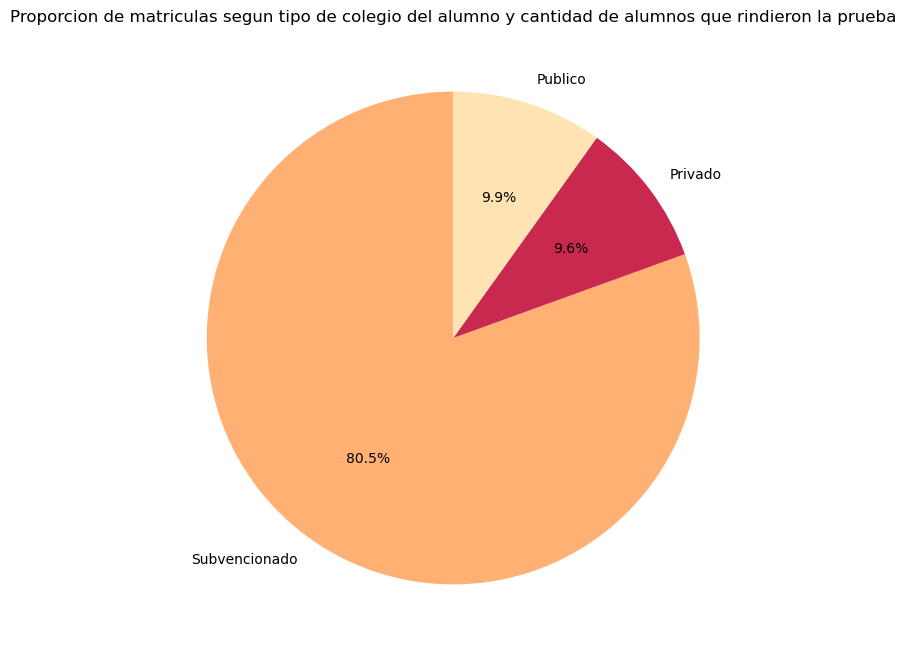

In [180]:
# los numeros son las cantidades que entrega .value_counts()
proporcion_subvencionados = 1440533*100//294601
proporcion_publicos = 79103*100//134603
proporcion_privados = 55665*100//92760

cantidades = [proporcion_subvencionados, proporcion_publicos, proporcion_privados]
nombres = ["Subvencionado", "Privado", "Publico"]
colores = ["#FFB072", "#C9284F", "#FFE3B3"]
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=nombres,colors=colores, autopct="%1.1f%%", startangle=90)
plt.title("Proporcion de matriculas segun tipo de colegio del alumno y cantidad de alumnos que rindieron la prueba")
plt.show()

# --------------------------------------------------------------------------------------------

In [73]:
# se crea como una copia para no alterar el original
df = rendicion.copy()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531598 entries, 0 to 531597
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AÑO                531598 non-null  int64  
 1   ID_aux             531598 non-null  int64  
 2   GRUPO_DEPENDENCIA  531598 non-null  int64  
 3   CODIGO_REGION      531598 non-null  int64  
 4   COMUNA             527208 non-null  object 
 5   PROMEDIO_NOTAS     531598 non-null  float64
 6   PTJE_NEM           531598 non-null  int64  
 7   PTJE_RANKING       531598 non-null  int64  
 8   CLEC_REG_ACTUAL    523509 non-null  float64
 9   MATE1_REG_ACTUAL   105474 non-null  float64
 10  MATE2_REG_ACTUAL   105474 non-null  float64
 11  HCSOC_REG_ACTUAL   523509 non-null  float64
 12  CIEN_REG_ACTUAL    523509 non-null  float64
 13  MATE_ACTUAL        418035 non-null  float64
dtypes: float64(7), int64(6), object(1)
memory usage: 56.8+ MB


In [77]:
# se crean segun categoria para luego poder agrupar por NOMBRE_COMUNA sumando las filas, sacando el total de cada tipo de institucion por comuna
dummy = pd.get_dummies(df["GRUPO_DEPENDENCIA"])
dummy = dummy.applymap(lambda x: 1 if x == True else 0)
df = pd.concat([df, dummy], axis=1)
df

C:\Users\alejo\AppData\Local\Temp\ipykernel_17696\2814713335.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dummy = dummy.applymap(lambda x: 1 if x == True else 0)


,AÑO,ID_aux,GRUPO_DEPENDENCIA,CODIGO_REGION,COMUNA,PROMEDIO_NOTAS,PTJE_NEM,PTJE_RANKING,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,MATE2_REG_ACTUAL,HCSOC_REG_ACTUAL,CIEN_REG_ACTUAL,MATE_ACTUAL,0,1,2,3,4
0,2023,900170003,3,13,SAN BERNARDO,5.03,429,429,0.0,402.0,351.0,423.0,0.0,NaN,0,0,0,1,0
1,2023,900470024,3,13,HUECHURABA,5.90,689,766,475.0,0.0,0.0,0.0,0.0,NaN,0,0,0,1,0
2,2023,1900170136,2,13,LA FLORIDA,6.30,799,880,761.0,790.0,545.0,0.0,728.0,NaN,0,0,1,0,0
3,2023,1900470154,2,13,RECOLETA,4.90,387,405,0.0,0.0,0.0,0.0,0.0,NaN,0,0,1,0,0
4,2023,1900770142,3,13,ESTACION CENTRAL,5.05,436,436,490.0,0.0,413.0,423.0,0.0,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531593,2019,9990999779067,2,13,PADRE HURTADO,6.15,654,830,372.0,NaN,NaN,0.0,329.0,329.0,0,0,1,0,0
531594,2019,9994599479410,2,13,PUDAHUEL,4.98,406,406,580.0,NaN,NaN,0.0,463.0,482.0,0,0,1,0,0
531595,2019,9995999979507,3,13,SAN BERNARDO,6.00,623,801,321.0,NaN,NaN,0.0,402.0,329.0,0,0,0,1,0
531596,2019,9997599679743,2,13,PROVIDENCIA,6.00,622,693,517.0,NaN,NaN,354.0,0.0,567.0,0,0,1,0,0


In [79]:
# eliminamos las columnas GRUPO_DEPENDENCIA y CODIGO_COMUNA ya que no las usaremos mas, tambien renombraremos las columnas
# generadas con dummy para hacerlas mas claras

In [83]:
df.rename(columns={1: "PRIVADO", 2: "SUBVENCIONADO", 3:"PUBLICO"}, inplace=True)
df = df[["COMUNA", "PRIVADO", "SUBVENCIONADO", "PUBLICO"]]
df = df.groupby("COMUNA").sum(numeric_only=True)

C:\Users\alejo\AppData\Local\Temp\ipykernel_17696\3865146565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={1: "PRIVADO", 2: "SUBVENCIONADO", 3:"PUBLICO"}, inplace=True)


In [85]:
df

,PRIVADO,SUBVENCIONADO,PUBLICO
COMUNA,,,
ALHUE,0,0,227
BUIN,1516,3080,3270
CALERA DE TANGO,1033,439,405
CERRILLOS,0,3551,247
CERRO NAVIA,0,1442,0
COLINA,4540,3418,4839
CONCHALI,0,2246,1349
CURACAVI,101,1445,831
EL BOSQUE,424,8749,1227


In [91]:
inscripcion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574505 entries, 0 to 574504
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID_aux                      574505 non-null  int64  
 1   AÑO                         574505 non-null  int64  
 2   SEXO                        574505 non-null  int64  
 3   GRUPO_DEPENDENCIA           574505 non-null  int64  
 4   FECHA_NACIMIENTO            574505 non-null  int64  
 5   ANYO_EGRESO                 574330 non-null  float64
 6   CODIGO_REGION               574505 non-null  int64  
 7   COMUNA                      574505 non-null  object 
 8   INGRESO_PERCAPITA_GRUPO_FA  574505 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 39.4+ MB


In [93]:
matriculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501288 entries, 0 to 501287
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID_aux     501288 non-null  int64  
 1   VIA        501288 non-null  int64  
 2   PTJE_POND  501288 non-null  float64
 3   AÑO        501288 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 15.3 MB


In [95]:
# conseguir enlazar el ingreso per capita con la comuna asi como puntaje ponderado
baseProceso = pd.merge(matriculas.copy(), inscripcion.copy(), on="ID_aux")

# en general ahora voy a hacer el mismo proceso de antes para añadir las columnas de interes a df de distribucion por comuna
baseProceso = baseProceso[["COMUNA", "INGRESO_PERCAPITA_GRUPO_FA", "PTJE_POND"]]

# agrupamos y sacamos promedio del INGRESO_PERCAPITA_GRUPO_FA
baseProceso = baseProceso.groupby("COMUNA").mean(numeric_only=True).round(2)
baseProceso

,INGRESO_PERCAPITA_GRUPO_FA,PTJE_POND
COMUNA,,
ALHUE,41795.55,638.93
BUIN,72474.64,638.09
CALERA DE TANGO,443531.55,649.85
CERRILLOS,107666.33,619.28
CERRO NAVIA,34180.72,618.28
COLINA,277380.24,662.76
CONCHALI,45334.75,618.67
CURACAVI,63330.79,627.94
EL BOSQUE,51350.03,615.27


In [97]:
ComunasPromedioIngresos = pd.concat([df ,baseProceso], axis=1)
ComunasPromedioIngresos

,PRIVADO,SUBVENCIONADO,PUBLICO,INGRESO_PERCAPITA_GRUPO_FA,PTJE_POND
COMUNA,,,,,
ALHUE,0,0,227,41795.55,638.93
BUIN,1516,3080,3270,72474.64,638.09
CALERA DE TANGO,1033,439,405,443531.55,649.85
CERRILLOS,0,3551,247,107666.33,619.28
CERRO NAVIA,0,1442,0,34180.72,618.28
COLINA,4540,3418,4839,277380.24,662.76
CONCHALI,0,2246,1349,45334.75,618.67
CURACAVI,101,1445,831,63330.79,627.94
EL BOSQUE,424,8749,1227,51350.03,615.27


# --------------------------------------------------------------------------------------------

In [344]:
inscripcion = pd.read_csv("Dataframe_inscripciones.csv", low_memory=False)
postulaciones = pd.read_csv("Dataframe_postulaciones.csv", low_memory=False)
matriculas = pd.read_csv("Dataframe_matriculas", low_memory=False)
rendicion = pd.read_csv("Dataframe_rendiciones", low_memory=False)

In [345]:
# Eliminar datos nulos, no aportan al análisis
rendicion = rendicion.dropna(subset=['GRUPO_DEPENDENCIA', 'ID_aux'])
inscripcion = inscripcion.dropna(subset=['GRUPO_DEPENDENCIA', 'ID_aux'])

In [346]:
# Cambiar a tipo str, para que los ids de ambos dataframe sean del mismo tipo (matricuas - rendicion)
matriculas["ID_aux"] = matriculas["ID_aux"].astype("str")

# Renombrar columnas para que tengan el mismo nombre en ambos dataframes (matricuas - rendicion)
inscripcion.rename(columns={'CODIGO_REGION_D': 'CODIGO_REGION'}, inplace=True)

# Revisar cambios
matriculas.info()
print("\n")
inscripcion.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501288 entries, 0 to 501287
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID_aux     501288 non-null  object 
 1   VIA        501288 non-null  int64  
 2   PTJE_POND  501288 non-null  float64
 3   AÑO        501288 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.3+ MB




Index(['ID_aux', 'ANYO_PROCESO', 'SEXO', 'GRUPO_DEPENDENCIA',
       'FECHA_NACIMIENTO', 'ANYO_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA_D',
       'INGRESO_PERCAPITA_GRUPO_FA'],
      dtype='object')

In [347]:
# Crear un DataFrame combinando 'rendicion' y 'matriculas' mediante 'ID_aux'
matriculas_rendicion = pd.merge(matriculas, rendicion[['ID_aux', 'CODIGO_REGION', 'GRUPO_DEPENDENCIA']],
                                on='ID_aux', how='inner')
matriculas_rendicion

,ID_aux,VIA,PTJE_POND,AÑO,CODIGO_REGION,GRUPO_DEPENDENCIA
0,514305173430,1,724.70,2023,5.0,3.0
1,514305173430,1,724.70,2023,5.0,3.0
2,699806974987,1,722.00,2023,13.0,3.0
3,642806479286,1,756.95,2023,4.0,2.0
4,847468472749,1,632.00,2023,10.0,3.0
...,...,...,...,...,...,...
693112,1239142260,1,593.55,2019,13.0,1.0
693113,4403444982,1,688.30,2019,2.0,3.0
693114,24232242681,1,686.40,2019,13.0,3.0
693115,34663645236,1,691.05,2019,2.0,3.0


In [348]:
# Filtrar los datos combinados para la Región de Santiago
region= 13

inscripcion_stgo = inscripcion[inscripcion['CODIGO_REGION'] == region]
rendicion_stgo = rendicion[rendicion['CODIGO_REGION'] == region]
matriculas_stgo = matriculas_rendicion[matriculas_rendicion['CODIGO_REGION'] == region]

In [349]:
# Listas de IDs en cada etapa
ids_inscripcion = set(inscripcion['ID_aux'])         # Inscritos
ids_rendicion = set(rendicion['ID_aux'])       # Rindieron la prueba
ids_matriculas = set(matriculas_stgo['ID_aux'])     # Matriculados

In [350]:
# Identificar IDs de estudiantes que abandonaron en la rendición
abandonos_rendicion_ids = ids_inscripcion - ids_rendicion

# Identificar IDs de estudiantes que abandonaron en la matrícula
abandonos_matricula_ids = ids_rendicion - ids_matriculas

In [352]:
inscripcion_stgo = inscripcion_stgo.copy()
rendicion_stgo = rendicion_stgo.copy()

# Crear DataFrames de abandonos en cada etapa
abandonos_rendicion = inscripcion_stgo[inscripcion_stgo['ID_aux'].isin(abandonos_rendicion_ids)]
abandonos_matricula = rendicion_stgo[rendicion_stgo['ID_aux'].isin(abandonos_matricula_ids)]

# Contar el número total de inscritos por tipo de colegio
total_inscritos = inscripcion_stgo.groupby('GRUPO_DEPENDENCIA', observed=True).size()

inscripcion_stgo['GRUPO_DEPENDENCIA'] = inscripcion_stgo['GRUPO_DEPENDENCIA'].astype('category')
# Asignar etiquetas descriptivas a las categorías
inscripcion_stgo['GRUPO_DEPENDENCIA'] = inscripcion_stgo['GRUPO_DEPENDENCIA'].cat.rename_categories({
    1: 'Privado',          # Particular pagado
    2: 'Subvencionado',    # Particular subvencionado
    3: 'Público'           # Municipal
})

rendicion_stgo['GRUPO_DEPENDENCIA'] = rendicion_stgo['GRUPO_DEPENDENCIA'].astype('category')
# Asignar etiquetas descriptivas a las categorías
rendicion_stgo['GRUPO_DEPENDENCIA'] = rendicion_stgo['GRUPO_DEPENDENCIA'].cat.rename_categories({
    1: 'Privado',          # Particular pagado
    2: 'Subvencionado',    # Particular subvencionado
    3: 'Público'           # Municipal
})

#eliminar tipo de colegio 4, no lo consideramos en nuestro análisis
inscripcion_stgo = inscripcion_stgo[inscripcion_stgo['GRUPO_DEPENDENCIA'] != 4]
rendicion_stgo = rendicion_stgo[rendicion_stgo['GRUPO_DEPENDENCIA'] != 4]
matriculas_stgo = matriculas_stgo[matriculas_stgo['GRUPO_DEPENDENCIA'] != 4]

# Contar el número de abandonos en cada etapa por tipo de colegio
abandonos_rendicion_count = abandonos_rendicion.groupby('GRUPO_DEPENDENCIA', observed=True).size()
abandonos_matricula_count = abandonos_matricula.groupby('GRUPO_DEPENDENCIA', observed=True).size()

# Calcular la tasa de abandono en cada etapa
tasa_abandono_rendicion = (abandonos_rendicion_count / total_inscritos) * 100
tasa_abandono_matricula = (abandonos_matricula_count / total_inscritos) * 100

# Crear un DataFrame para visualizar los resultados
tasa_abandono = pd.DataFrame({
    'Tasa Abandono Rendición (%)': tasa_abandono_rendicion.fillna(0),
    'Tasa Abandono Matrícula (%)': tasa_abandono_matricula.fillna(0)
})

# Sumar las tasas de abandono en rendición y matrícula para obtener una tasa acumulada
tasa_abandono['Tasa Abandono Total Acumulada (%)'] = (
    tasa_abandono['Tasa Abandono Rendición (%)'] + tasa_abandono['Tasa Abandono Matrícula (%)']
)

# Mostrar las tasas de abandono por tipo de colegio
print(tasa_abandono)

                   Tasa Abandono Rendición (%)  Tasa Abandono Matrícula (%)  \
GRUPO_DEPENDENCIA                                                             
Privado                               1.209937                    24.544429   
Subvencionado                         4.706954                    52.239738   
Público                               8.361091                    56.367859   

                   Tasa Abandono Total Acumulada (%)  
GRUPO_DEPENDENCIA                                     
Privado                                    25.754366  
Subvencionado                              56.946692  
Público                                    64.728950  


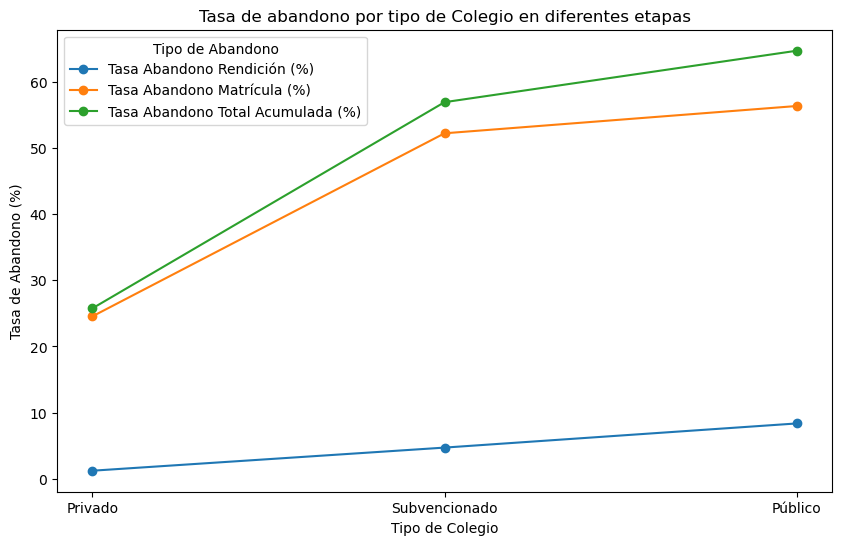

In [353]:
tasa_abandono.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Tasa de abandono por tipo de Colegio en diferentes etapas')
plt.xlabel('Tipo de Colegio')
plt.ylabel('Tasa de Abandono (%)')
plt.legend(title='Tipo de Abandono')
plt.xticks(ticks=range(len(tasa_abandono.index)), labels=tasa_abandono.index)
plt.show()

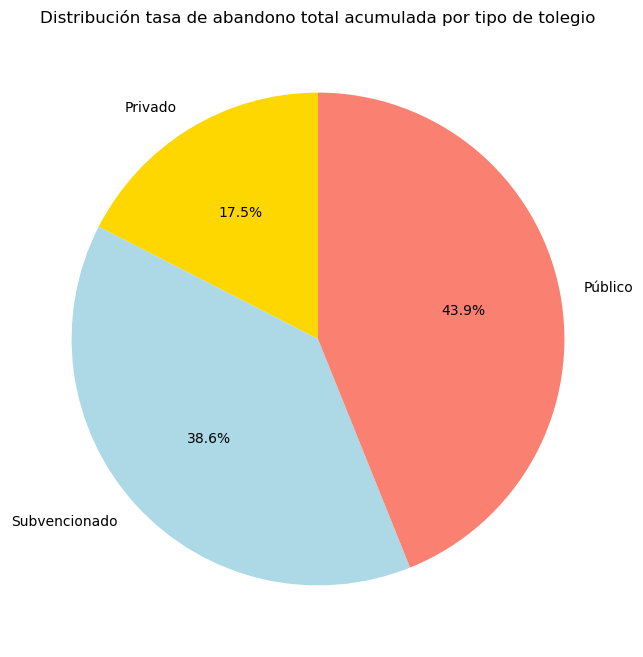

In [354]:
tasa_abandono['Tasa Abandono Total Acumulada (%)'].plot(
    kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['gold', 'lightblue', 'salmon']
)
plt.title('Distribución tasa de abandono total acumulada por tipo de tolegio')
plt.ylabel('')
plt.show()

# Resumen de los resultados

# ¿Qué podría salir mal?

- Pandemia durante el trascurso del periodo delimitado (2019 - 2023)

Entre 2020 y 2022, la pandemia de COVID-19 afectó la educación, obligando a muchos colegios a adaptarse a clases virtuales. Esto generó problemas como desigualdad en el acceso a tecnología, dificultades para enseñar y aprender en línea. La falta de preparación y recursos amplió las brechas educativas, afectando su rendimiento significativamente.

- Cambio  de prueba durante el trancurso del periodo delimitado (2019 - 2023)

El sistema de admisión a la educación superior en Chile ha pasado por varios cambios recientes. En 2020, la PSU (Prueba de Selección Universitaria) fue reemplazada por la PDT (Prueba de Transición), con un enfoque en medir competencias fundamentales y reducir contenidos específicos. Luego, en 2023, el Ministerio de Educación introdujo la PAES (Prueba de Acceso a la Educación Superior), que incluyó la división de la prueba de Matemáticas en dos versiones: Matemática 1 (M1), orientada a habilidades generales, y Matemática 2 (M2), para carreras que requieren un nivel avanzado en esta área. Además, se ajustó la escala de puntajes, cambiando de un rango de 150 a 850 puntos en la PDT a uno de 100 a 1.000 puntos en la PAES, buscando mostrar de manera más precisa las diferencias en los niveles de desempeño de cada estudiante.

- Cantidad de estudiante que rindieron por comuna

A raíz de nuestro análisis, hemos identificado que la cantidad de personas por comuna que rindieron la prueba de admisión a la educación superior varía en gran medida en algunos casos. Esto implica que las comparaciones entre comunas no son completamente proporcionales, ya que las diferencias en la cantidad de postulantes pueden influir en los resultados generales. Este aspecto debe ser considerado al interpretar los datos, ya que puede generar sesgos o conclusiones que no reflejen adecuadamente las realidades educativas de cada comuna.